# Text Mining 20th Century Text

## 01. Import Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rebecca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rebecca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rebecca\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 02. Import 20th Century Scrape

In [2]:
# Import txt file

with open('Key_Events_20th_century_Wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

## 03. Tokenization

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depressio

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.2', 'Spanish', 'f

In [5]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4923 samples and 22452 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1614),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 411),
 ('to', 333),
 ('The', 330),
 ('[', 309),
 (']', 309),
 ('in', 304)]

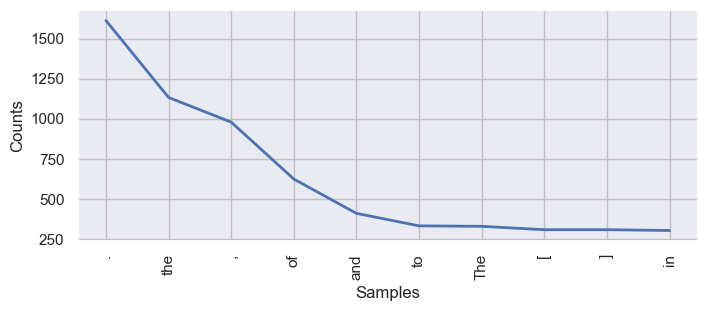

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## 04. Stopwords

In [8]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'hadn', "we'll", 'up', 'a', 'doing', 'by', "it'll", 'my', 'ourselves', 's', "we're", 'further', 'these', "hasn't", "it'd", "i'll", 'other', 'from', 'ours', 'that', 'after', 'because', 'against', 'above', 'any', 'what', 'were', 'where', 'an', 'ain', "weren't", "we'd", 'has', 'the', 'here', 'our', 'there', "wouldn't", 'during', 'until', 'yours', 'herself', 'y', 'isn', "aren't", "i'm", 'while', 'm', 'me', 'having', 'o', 'about', 'for', 'if', 'we', 'when', 'all', 'no', 'mustn', 'be', 'below', 'so', 'd', 'ma', 'why', 'at', 'their', "you've", "she'll", "they've", 'this', 'out', 're', "isn't", 'are', 'am', 'have', 'only', 'both', "she's", 'its', 'in', "doesn't", 'she', 'your', 'wasn', 'few', 'with', "she'd", 'shan', 'those', "didn't", 'whom', 'each', "he's", 'of', 'itself', 'most', 'to', "i've", 'now', 'been', 'had', 'was', "don't", 'i', 'her', 'or', 'it', 'he', "haven't", 'between', 'his', 'through', 'will', 'is', "he'll", "they'll", 'they', 'on', 'same', 'under', 'himself', 'down', 'won', 

In [9]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.2',
 'Spanish',
 'flu',
 '1.2.1',
 'Russian',
 'Revolution',
 'commu

In [11]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4820 samples and 17663 outcomes>


In [12]:
dist_words_filter

FreqDist({'.': 1614, ',': 980, 'The': 330, '[': 309, ']': 309, "''": 277, '^': 274, '``': 273, '(': 259, ')': 259, ...})

In [13]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [14]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pages    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                            Spanish    flu             Russian    Revolution    communism           Between    wars             Economic    depression             The    rise 

In [15]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', '

In [16]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

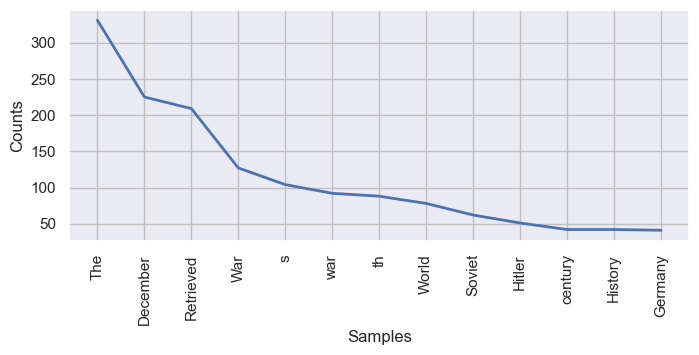

In [17]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(13, cumulative = False)
plt.show()

In [18]:
dist_words_filter_2.most_common(20)

[('The', 331),
 ('December', 225),
 ('Retrieved', 209),
 ('War', 127),
 ('s', 104),
 ('war', 92),
 ('th', 88),
 ('World', 78),
 ('Soviet', 62),
 ('Hitler', 51),
 ('century', 42),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 39),
 ('Japanese', 36),
 ('In', 35),
 ('German', 35),
 ('would', 35)]

### Comments: 
### The first plot was made up for primarily all punctuation marks and prepositions, which isn't helpful when trying to understand the most common words. In the second plot, I choose to look at the top 13 words, as I don't find 'The', 's', and 'th' to be very helpful and they should be removed in Stop Words. The remaining words aren't surprising that they're the most frequent words. However, I think 'Retrieved' is an odd word to be used so frequently.

## 05. Tags with TextBlob

In [19]:
# Note: I am adding Retrieved and ISBN to the list, as both word are used for all source materials, which isn't needed for our analysis

new_stopwords = ["The", "Retrieved", 's', 'th', 's', 'ISBN', 'In', 'would']

In [20]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [21]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 15.6 ms
Wall time: 12.5 ms


In [22]:
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlor

In [23]:
tags_list = text.tags

In [24]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

## 06. Top 10 POS tags

In [25]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [26]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [27]:
df_t = df_text.groupby('Word type').count().reset_index()

In [28]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,78
2,DT,12
3,EX,13
4,FW,43


## 07. Seaborn Plot

In [29]:
top10 = df_t.nlargest(10, 'Words')

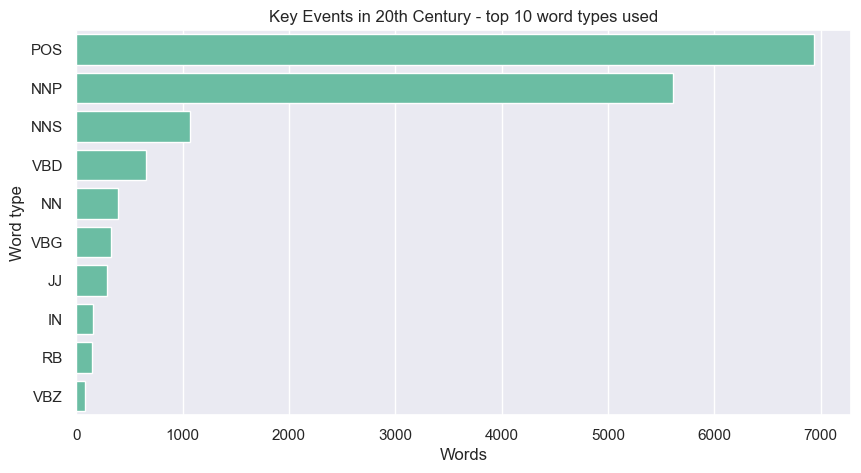

In [30]:
plt.figure(figsize = (10, 5))
with sns.color_palette("Set2", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("Key Events in 20th Century - top 10 word types used")

## 08. Bar Plots

### Nouns

In [31]:
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df_nouns.columns = ["Word", "Occurences"]
x = df_nouns.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurences')

In [32]:
top15_nouns

,Word,Occurences
306,'December,225
1310,'War,127
2652,'war,92
1357,'World,78
1150,'Soviet,62
562,'Hitler,51
1547,'century,42
561,'History,42
1834,'first,41
2679,'world,39


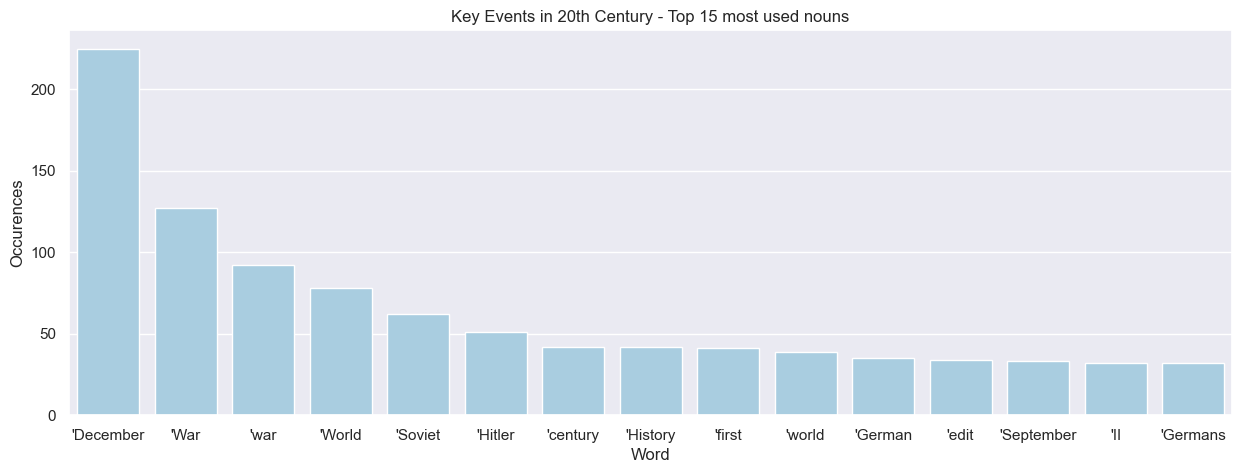

In [33]:
plt.figure(figsize=(15, 5))
with sns.color_palette("Paired", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_nouns).set_title("Key Events in 20th Century - Top 15 most used nouns")

### Verbs

In [34]:
df_verbs = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df_verbs.columns = ["Word", "Occurences"]
x = df_verbs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verbs = y.nlargest(15, 'Occurences')

In [35]:
top15_verbs

,Word,Occurences
35,'United,31
0,'Allied,19
195,'led,15
1,'Archived,14
323,'used,13
193,'launched,12
91,'controlled,9
158,'forced,8
314,'turned,7
75,'changed,7


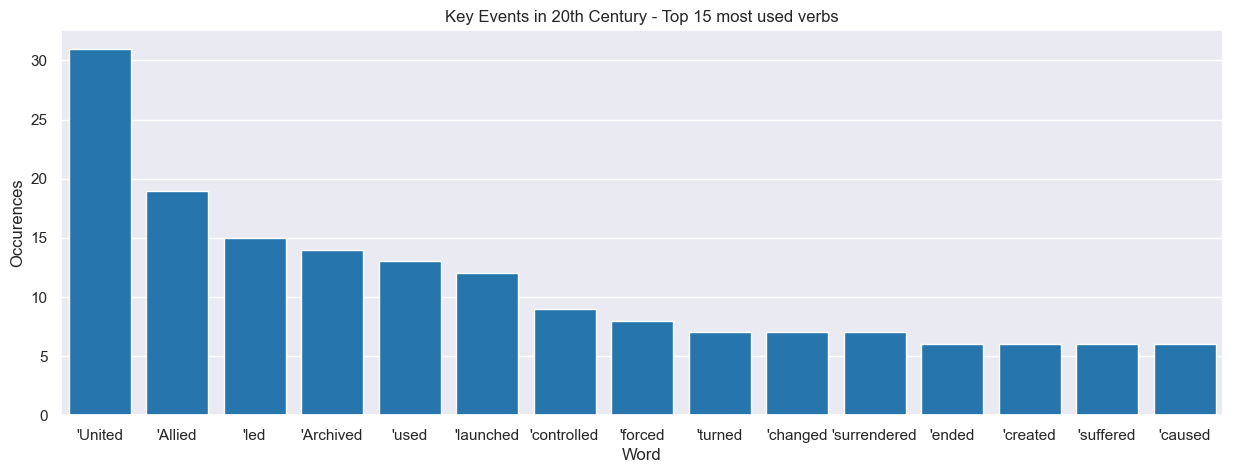

In [36]:
plt.figure(figsize = (15, 5))
with sns.color_palette("tab10", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15_verbs).set_title("Key Events in 20th Century - Top 15 most used verbs")

### Adjectives

In [37]:
df_adjectives = df_text[df_text['Word type'] == "JJ"]
df_adjectives.columns = ["Word", "Occurences"]
x = df_adjectives.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adjectives = y.nlargest(15, 'Occurences')

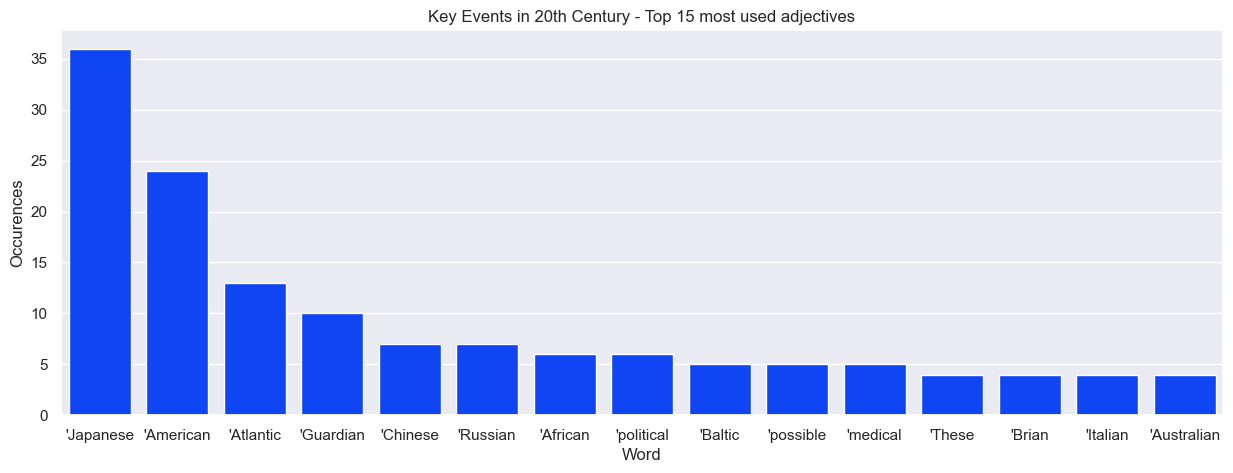

In [38]:
plt.figure(figsize=(15, 5))
with sns.color_palette("bright", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15_adjectives).set_title("Key Events in 20th Century - Top 15 most used adjectives")

### Analysis of bar plots: 
### We know that WWII was the war that dominated the 20th century, so it's no surprise that all bar plots really revolve around tensions before, during, and after the war. All bar plots really focus on that general theme. 
### The noun bar plot has the highest frequency and dominates over verbs and adjectives, which makes sense since most content words are nouns. Verbs and adjectives have a close distribution, however there are slightly more adjectives. 
### I thought for sure the top word in the noun plot would be "war" but I guess "December" was the most frequent. I wonder if that has anything to do with the references and when the reference was published, skewing the frequency higher. I'm also surprised that the lowest on the plot is "Germans." I thought that would be much higher on the list. I'm not surprised that the top two words for verbs were "United" and "Allied." The top two words for adjectives also wasn't surprising: "Japanese" and "American." I did chuckle when I saw "Brian" as a frequent word for adjectives - I don't recall a notable "Brian" in the 20th Century, so I'm sure Brian is a frequent name for references, skewing that.

## 09. Countries

In [57]:
# Counting country occurrences

listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources Exte

In [40]:
# Create a count for countries

all_countries_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [58]:
# Load countries

countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col=0)

In [59]:
country_list = countries['country_name'].str.strip().to_list()

In [60]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [63]:
# Count occurrences of each country

dict_of_country_counts = {
    country: len(re.findall(rf'\b{re.escape(country)}\b', listToStr))
    for country in country_list
}

In [62]:
dict_of_country_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 1,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [64]:
# Search for countries from the list in the dictionary

dct = {v:[k] for v,k in dict_of_country_counts.items()}  
df = pd.DataFrame(dct)

In [65]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df = df.transpose().reset_index()

In [67]:
df.dtypes

index    object
0         int64
dtype: object

In [68]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [69]:
df.rename(columns = {"index":"Countries", 0:"Times mentioned"}, inplace = True)

In [70]:
df

,Countries,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [71]:
df.shape

(208, 2)

## 10. Frequency Plot Chart - Countries

In [80]:
top50 = df.sort_values("Times mentioned", ascending=False).head(50)

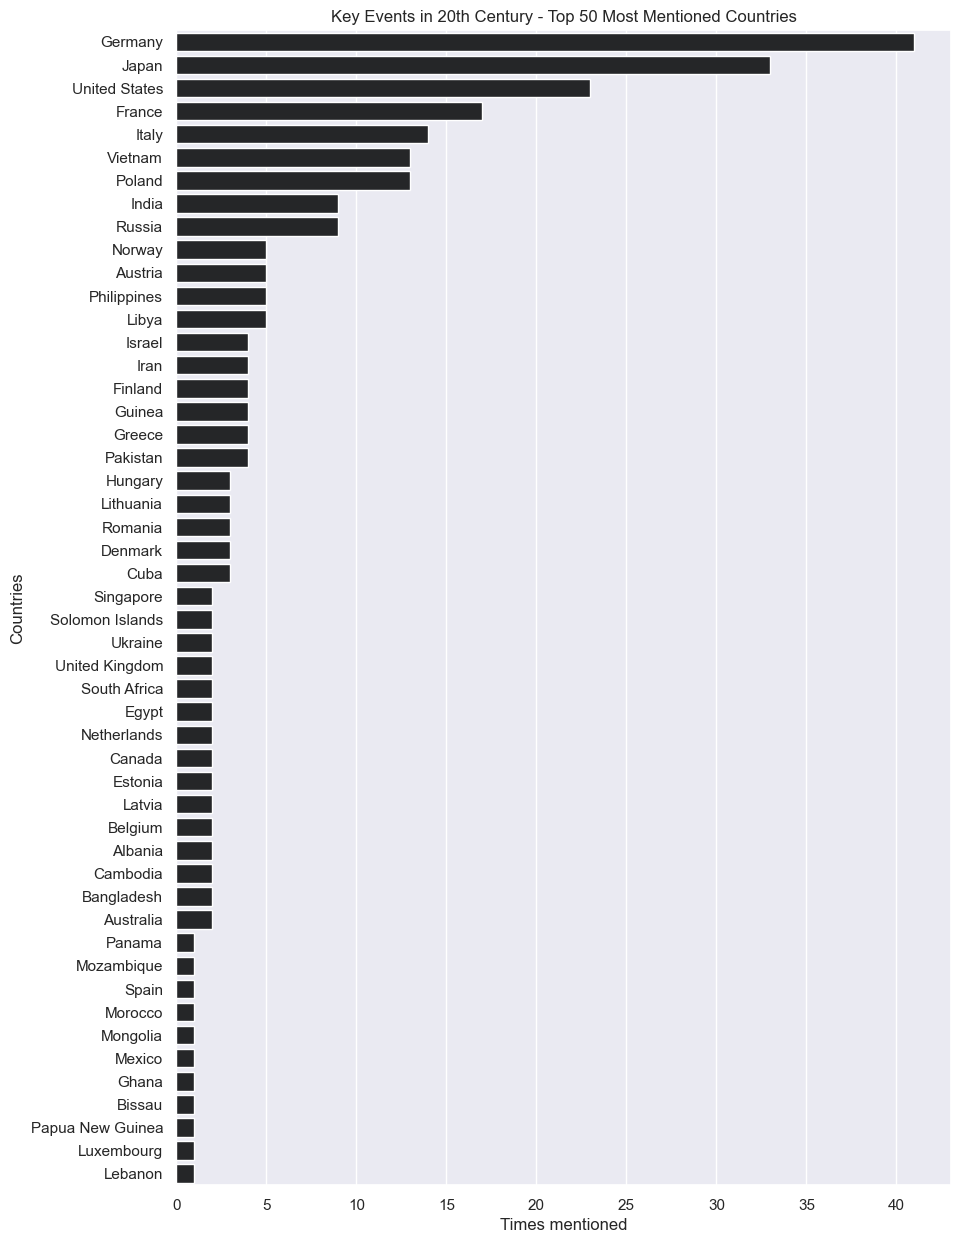

In [84]:
plt.figure(figsize=(10, 15))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Countries",
    saturation=0.9, data = top50).set_title("Key Events in 20th Century - Top 50 Most Mentioned Countries")
plt.show()

### Comments: 
### I decided to look at only the top 50 mentioned countries so we could see the data. The chart only mentions the countries that match the countries list we have. If United States was referred to as "America," that wouldn't be included. If cities were listed, but not the countries then the countries would obviously not be included. 
### Germany is, of course, the highest country mentioned as well as Japan and United States, as those countries played a central role in WWII. 
### As we are matching our countries list to a Wikipedia page, it's worth mentioning that Wikipedia pages are editable by anybody. That makes Wikipedia an unreliable source and text frequency may not perfectly represent importance. 